In [2]:
import os
import sys
import re
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tqdm import tqdm

In [3]:
def get_results_only(logfile, outfile):
    with open(logfile, 'r') as logfile:
        with open(outfile, 'a') as out:
            log = logfile.readlines()
            for l in log:
                if l.find("step") > 0 and l.find("epoch") > 0:
                    out.write(l + '\n')
                elif l.find("test eval") > 0:
                    out.write(l + '\n')
                elif l.find("test avg") > 0:
                    out.write(l + '\n')
                else:
                    continue

In [4]:
# Get training result detail from log file
# step, epoch, learning rate, step-time, loss 7.814, test eval: loss 34.15
# test avt_score
def get_training_results(logfile):
    result_dict = {}
    step =[]
    epoch = []
    lr = []
    st = []
    loss = []
    test_eval_loss = []
    test_avg_score = []

    with open(logfile, 'r') as logfile:
        log = logfile.readlines()
        for l in tqdm(log):
            if l.find("step") > 0 and l.find("epoch") > 0:
                step.append(int(re.search(r"(?<=step ).*?(?= epoch)", l).group(0)))
                epoch.append(int(re.search(r"(?<=epoch ).*?(?= learning rate)", l).group(0)))
                lr.append(re.search(r"(?<=learning rate ).*?(?= step-time)", l).group(0))
                st.append(re.search(r"(?<=step-time ).*?(?= loss)", l).group(0))
                loss.append(re.search(r"(?<=loss ).*", l).group(0))
            elif l.find("test eval") > 0:
                test_eval_loss.append(re.search(r"(?<=loss ).*", l).group(0))
            elif l.find("test avg_score") > 0:
                test_avg_score.append(float(re.search(r"(?<=score=).*", l).group(0)))
            else:
                continue
    
    result_dict['step']=step
    result_dict['epoch']=epoch
    result_dict['lr']=lr
    result_dict['st']=st
    result_dict['loss']=loss
    result_dict['test_eval_loss']=test_eval_loss
    result_dict['test_avg_score']=test_avg_score

    return result_dict

In [5]:
# get graph for model 
# test evaluation loss, test avgerage score(blue) per step & epoch
# Input: dataset foler name, model
def get_graph_one(dataset, model):
    title = dataset
    log_file = os.path.abspath(os.path.join(os.curdir, os.pardir))+'/'+dataset+'/model/'+model+'/log.txt'
    result_dict = get_training_results(log_file)

    step = result_dict['step']
    epoch = result_dict['epoch']
    # eval_loss = result_dict['test_eval_loss'] 
    avg_blue = result_dict['test_avg_score']

    return step, epoch, avg_blue

### Hybird-Deepcom Original (Traiditional SBT)

100%|██████████| 811/811 [00:00<00:00, 191261.21it/s]


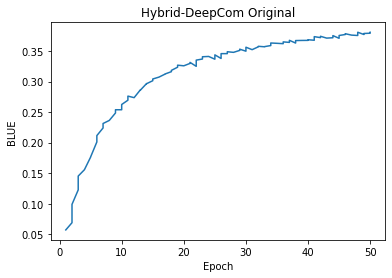

In [6]:
step1, epoch1, avg_blue1 = get_graph_one('emse-data(original)', 'hybrid')
df1 = pd.DataFrame({
    'epoch' : epoch1,
    'step' : step1,
    'avg_blue' : avg_blue1
})

%matplotlib inline
plt.plot(df1['epoch'], df1['avg_blue'])
plt.xlabel('Epoch')
plt.ylabel('BLUE')
plt.title('Hybrid-DeepCom Original')
plt.show()

### Hybrid-Deepcom with SBTCODE

100%|██████████| 811/811 [00:00<00:00, 286883.74it/s]


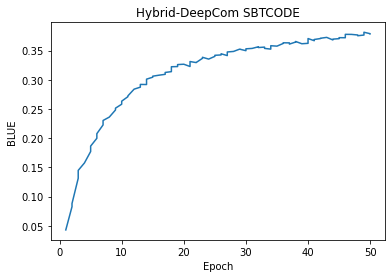

In [7]:
step2, epoch2, avg_blue2 = get_graph_one('emse-data(sbt_code_hb)', 'hybrid')
df2 = pd.DataFrame({
    'epoch' : epoch2,
    'step' : step2,
    'avg_blue' : avg_blue2
})

%matplotlib inline
plt.plot(df2['epoch'], df2['avg_blue'])
plt.xlabel('Epoch')
plt.ylabel('BLUE')
plt.title('Hybrid-DeepCom SBTCODE')
plt.show()

### Hybrid-Deepcom with SIMSBTCODE

100%|██████████| 811/811 [00:00<00:00, 276035.10it/s]


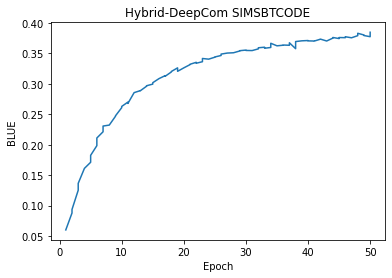

In [8]:
step3, epoch3, avg_blue3 = get_graph_one('emse-data(simsbt_code_hb)', 'hybrid')
df3 = pd.DataFrame({
    'epoch' : epoch3,
    'step' : step3,
    'avg_blue' : avg_blue3
})

%matplotlib inline
plt.plot(df3['epoch'], df3['avg_blue'])
plt.xlabel('Epoch')
plt.ylabel('BLUE')
plt.title('Hybrid-DeepCom SIMSBTCODE')
plt.show()

### Compare BLEU (SBT, SBTCODE, SIMSBTCODE) in H-Deepcom

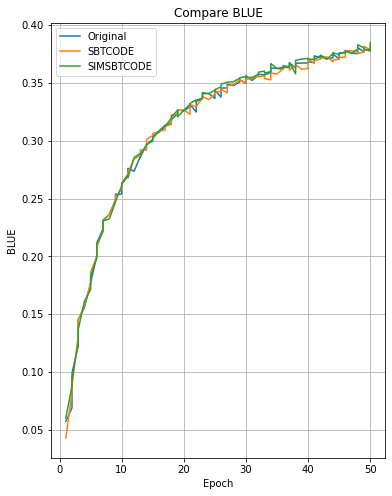

In [21]:
%matplotlib inline
plt.figure(figsize=(6,8))
plt.plot(df1['epoch'], df1['avg_blue'])
plt.plot(df2['epoch'], df2['avg_blue'])
plt.plot(df3['epoch'], df3['avg_blue'])
plt.xlabel('Epoch')
plt.ylabel('BLUE')   
plt.grid()
plt.title('Compare BLUE')
plt.legend(['Original', 'SBTCODE', 'SIMSBTCODE'])
plt.show()

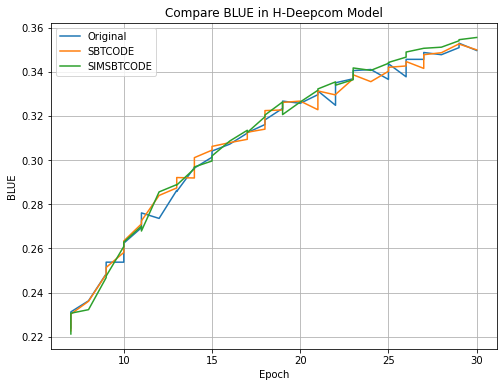

In [33]:
%matplotlib inline
plt.figure(figsize=(8,6))
plt.plot(df1['epoch'][10:51], df1['avg_blue'][10:51])
plt.plot(df2['epoch'][10:51], df2['avg_blue'][10:51])
plt.plot(df3['epoch'][10:51], df3['avg_blue'][10:51])
plt.xlabel('Epoch')
plt.ylabel('BLUE')   
plt.grid()
plt.title('Compare BLUE in H-Deepcom Model')
plt.legend(['Original', 'SBTCODE', 'SIMSBTCODE'])
plt.show()

### Compare BLUE (SBT, SBTCODE, SIMSBTCODE) - in Deepcom

In [34]:
step4, epoch4, avg_blue4 = get_graph_one('emse-data(ast_only)', 'default')
df4 = pd.DataFrame({
    'epoch' : epoch4,
    'step' : step4,
    'avg_blue' : avg_blue4
})

100%|██████████| 1301/1301 [00:00<00:00, 173451.67it/s]


In [35]:
step5, epoch5, avg_blue5 = get_graph_one('emse-data(sbt_code)', 'default')
df5 = pd.DataFrame({
    'epoch' : epoch5,
    'step' : step5,
    'avg_blue' : avg_blue5
})

100%|██████████| 1336/1336 [00:00<00:00, 177295.14it/s]


In [36]:
step6, epoch6, avg_blue6 = get_graph_one('emse-data(simsbt_code)', 'default')
df6 = pd.DataFrame({
    'epoch' : epoch6,
    'step' : step6,
    'avg_blue' : avg_blue6
})

100%|██████████| 917/917 [00:00<00:00, 138936.41it/s]


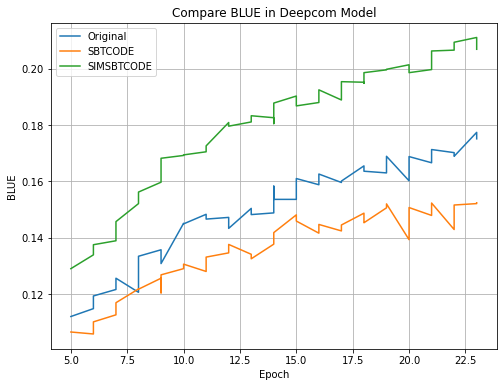

In [37]:
%matplotlib inline
plt.figure(figsize=(8,6))
# plt.plot(df4['epoch'][10:51], df4['avg_blue'][10:51])
# plt.plot(df5['epoch'][10:51], df5['avg_blue'][10:51])
# plt.plot(df6['epoch'][10:51], df6['avg_blue'][10:51])
plt.plot(df4['epoch'], df4['avg_blue'])
plt.plot(df5['epoch'], df5['avg_blue'])
plt.plot(df6['epoch'], df6['avg_blue'])
plt.xlabel('Epoch')
plt.ylabel('BLUE')   
plt.grid()
plt.title('Compare BLUE in Deepcom Model')
plt.legend(['Original', 'SBTCODE', 'SIMSBTCODE'])
plt.show()